In [1]:
source('../helpfuncs/BADS-HelperFunctions.R')

In [5]:
loans = get.loan.dataset.nofact(fpath='../data/Loan_Data.csv')
head(loans)

YOB nKIDS nDEP PHON dINC_SP EMPS_A dINC_A RES dHVAL  dMBO dOUTM dOUTL dOUTHP
1  19     4    0    1       0      R      0   O 14464     4     0     0      0
2  41     2    0    1       0      P  36000   O     0     0   280   664      0
3  66     0    0    1       0      N  30000   N     0     0     0     0      0
4  51     2    0    1       0      P    464   O 24928  8464   584   320      0
5  65     0    0    1       0      P  15000   P     0     0     0     0      0
6  42     2    0    1   10500      E  48000   O 43392 46464  1120     0      0
  dOUTCC BAD YOB_missing
1      0   0           0
2     80   0           0
3      0   0           0
4     60   0           0
5      0   0           0
6      0   0           0

List of 5
 $ sdev    : num [1:13] 1.61 1.11 1.09 1.03 1 ...
 $ rotation: num [1:13, 1:13] 0.1346 -0.3122 -0.0703 -0.1156 -0.2389 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:13] "YOB" "nKIDS" "nDEP" "PHON" ...
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:13] -2.26e-17 -1.19e-17 -1.51e-17 1.76e-16 -2.79e-17 ...
  ..- attr(*, "names")= chr [1:13] "YOB" "nKIDS" "nDEP" "PHON" ...
 $ scale   : logi FALSE
 $ x       : num [1:1225, 1:13] -0.0043 -0.1971 1.2202 -0.2213 1.5799 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


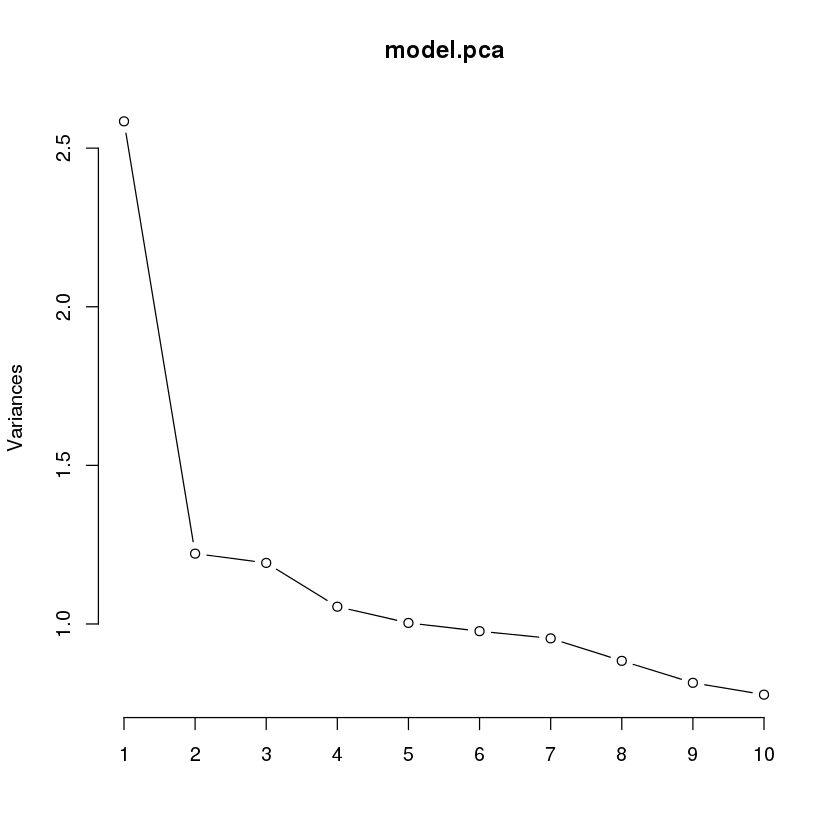

In [18]:
numcols = sapply(loans,is.numeric)
loans_scaled = scale(loans[,numcols])

model.pca = prcomp(loans_scaled[,-(ncol(loans_scaled)-1)]) # removing BAD column
plot(model.pca, type = "l")
str(model.pca)


  0   1 
902 323 

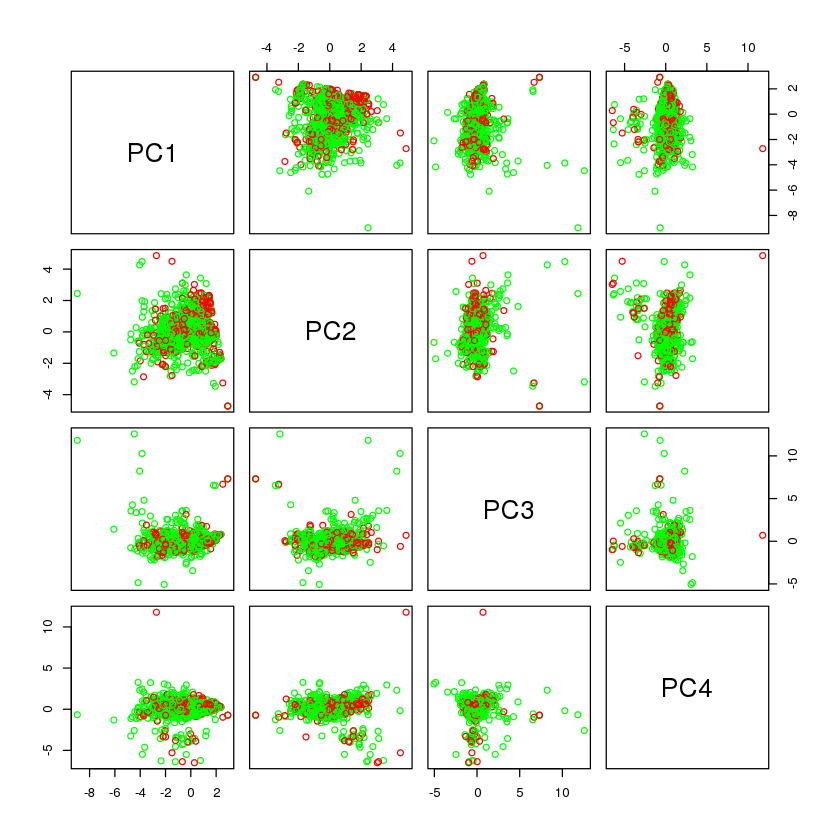

In [19]:
PCs = model.pca$x
colors = c("red", "green")
Y = ifelse(loans[,"BAD"] == 0, "green", "red")
table(loans[,"BAD"])
pairs(PCs[,1:4],col=Y)

In [20]:
model.pca$rotation

PC1         PC2         PC3         PC4         PC5
YOB          0.13459492 -0.61875821  0.10488430 -0.15533208  0.04544495
nKIDS       -0.31224736  0.13850717  0.02684453 -0.24447274 -0.02062107
nDEP        -0.07033318  0.27467092 -0.04447471 -0.70380466 -0.12558016
PHON        -0.11555580  0.43478847 -0.18469950 -0.07367566  0.22013796
dINC_SP     -0.23891691  0.27108051  0.44624605  0.30491600  0.26684869
dINC_A      -0.39077849 -0.18887019 -0.26906942 -0.19046365  0.03074886
dHVAL       -0.44141098 -0.01197493 -0.06790410  0.24924930 -0.04718704
dMBO        -0.47278540 -0.16553268 -0.03527960  0.11453509 -0.08794311
dOUTM       -0.42162140 -0.30997282  0.03095081 -0.17026420 -0.11536913
dOUTL       -0.07310597  0.12079445  0.02924577  0.32171785 -0.73809224
dOUTHP      -0.11067226 -0.12599014 -0.31020378  0.22607434  0.52060962
dOUTCC      -0.20153871  0.10714328  0.57724029 -0.14556916  0.14437637
YOB_missing  0.04417923 -0.24236379  0.49350911 -0.07778173  0.03456877
                    PC6         PC7          PC8         PC9         PC10
YOB         -0.24403055  0.45154095 -0.141042829  0.01866609 -0.335352870
nKIDS       -0.09127883 -0.07597455  0.207203373 -0.81353035 -0.260240394
nDEP         0.34962762 -0.04956686 -0.358405835  0.26355911 -0.270268451
PHON        -0.20094943  0.55103510  0.496820448  0.28220025 -0.153760708
dINC_SP     -0.15124056 -0.01049642 -0.301580475  0.09693669 -0.375479515
dINC_A       0.06127011  0.11741537  0.117723518  0.01062524  0.387133234
dHVAL        0.09266790 -0.24845270  0.062208663  0.27226650  0.065653198
dMBO        -0.06153114 -0.13093472 -0.002019906  0.10452720 -0.266806027
dOUTM       -0.18112126  0.05397122 -0.050529356  0.14804767  0.009238095
dOUTL        0.29215020  0.46397794 -0.076768664 -0.10299786 -0.072074398
dOUTHP       0.58891194  0.25562896 -0.231264427 -0.19185276 -0.095198226
dOUTCC       0.03574840  0.31378944 -0.185779082 -0.09788579  0.560604379
YOB_missing  0.51404679 -0.09733703  0.597294759  0.12344707 -0.167789033
                     PC11         PC12         PC13
YOB          0.0841911467 -0.374265454 -0.136097405
nKIDS        0.0673670663 -0.079895292 -0.157762800
nDEP         0.0244542900 -0.098871141 -0.022061591
PHON         0.1201430643  0.032202133  0.001237159
dINC_SP     -0.4817192203 -0.037448148 -0.091348338
dINC_A      -0.6547761299 -0.289674067  0.089290917
dHVAL        0.3547509152 -0.424779496 -0.526439864
dMBO         0.2471493150 -0.053781313  0.748301614
dOUTM       -0.0002118088  0.733368688 -0.291187584
dOUTL       -0.0869900325  0.008438119 -0.031047254
dOUTHP       0.1092835183  0.171644621 -0.024210426
dOUTCC       0.3055716324 -0.069557327  0.127806234
YOB_missing -0.1128749629  0.043419139  0.003716108

In [21]:
# note the PCs are all orthagonal and are unit length
t(model.pca$rotation[,1]) %*% model.pca$rotation[,2] # approximately 0
sqrt(t(model.pca$rotation[,1])%*%model.pca$rotation[,1]) # 1

[,1]
[1,] -1.249001e-16

[,1]
[1,]    1